<a href="https://colab.research.google.com/github/sonia-br/stat_analysis_vaccination/blob/main/Script_for_dataset_cleaning_Sofia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
import zipfile # Ensure zipfile is imported

In [ ]:
try:
    import openpyxl
    print("openpyxl is installed.")
except ImportError:
    print("openpyxl not found. Installing...")
    !pip install openpyxl
    import openpyxl
    print("openpyxl installed successfully.")

openpyxl is installed.


In [ ]:
# uncomment this if reading file from github doesn't work
# 1. mount your MyDrive
# 2. add dataset file to MyDrive
# 3. update the path if needed
# mounting drive to use files from the MyDrive
# drive.mount('/content/drive')

# file_path = '/content/drive/MyDrive/wgm2018-dataset-crosstabs-all-countries.csv' # Replace with the actual path to your file|
!wget https://raw.githubusercontent.com/sonia-br/stat_analysis_vaccination/main/wgm2018-dataset-crosstabs-all-countries.csv
file_path = 'wgm2018-dataset-crosstabs-all-countries.csv'

Mounted at /content/drive


---

### Cleaning Trust in Science rate data

In [ ]:
# opening the Raw data file
data = pd.read_csv(file_path, sep=';')

/tmp/ipython-input-4-1116300671.py:2: DtypeWarning: Columns (19,36,42,44,50,53,55,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';')


In [ ]:
# first 5 rows of the data
data.head()

,WP5,wgt,PROJWT,FIELD_DATE,YEAR_CALENDAR,Q1,Q2,Q3,Q4,Q5A,...,Age,AgeCategories,Gender,Education,Urban_Rural,Household_Income,Regions_Report,Subjective_Income,WBI,EMP_2010
0,1,"0,652821175","171769,5977",08.01.18,2018,3,2,1,2,2,...,72,3,2,3,1,3,7,2,4,6
1,1,"0,695706296","183053,4842",08.01.18,2018,2,2,1,2,1,...,72,3,1,2,2,3,7,1,4,6
2,1,"0,523829046","137829,3289",08.01.18,2018,2,2,1,98,1,...,85,3,1,2,1,2,7,3,4,6
3,1,"0,764442256","201139,215",08.01.18,2018,2,1,1,2,1,...,54,3,1,3,2,5,7,1,4,1
4,1,"3,327945925","875645,5127",08.01.18,2018,2,1,1,2,1,...,20,1,1,2,2,2,7,1,4,6


In [ ]:
# fetching column names of the data
data.columns

Index(['WP5', 'wgt', 'PROJWT', 'FIELD_DATE', 'YEAR_CALENDAR', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5A', 'Q5B', 'Q5C', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10A', 'Q10B',
       'Q11A', 'Q11B', 'Q11C', 'Q11D', 'Q11E', 'Q11F', 'Q11G', 'Q12', 'Q13',
       'Q14A', 'Q14B', 'Q15A', 'Q15B', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'D1', 'Q29',
       'Q30', 'WGM_Index', 'WGM_Indexr', 'ViewOfScience', 'Age',
       'AgeCategories', 'Gender', 'Education', 'Urban_Rural',
       'Household_Income', 'Regions_Report', 'Subjective_Income', 'WBI',
       'EMP_2010'],
      dtype='object')

In [ ]:
# filtering only 2018 and only those columns that we are interested in
data = data[['WP5','YEAR_CALENDAR', 'Q11C', 'Q12']].query('YEAR_CALENDAR == 2018')

In [ ]:
# making Questions binary: 1 == "A lot" ; 0 == "Else"
data['Q11C_binary'] = data['Q11C'].apply(lambda x: 1 if x == 1 else 0)
data['Q12_binary'] = data['Q12'].apply(lambda x: 1 if x == 1 else 0)

data.head()

,WP5,YEAR_CALENDAR,Q11C,Q12,Q11C_binary,Q12_binary
0,1,2018,2,2,0,0
1,1,2018,1,2,1,0
2,1,2018,3,98,0,0
3,1,2018,1,1,1,1
4,1,2018,1,1,1,1


In [ ]:
# mapping country names to WP5 to have some clarity
country_mapping_str = "1=United States, 2=Egypt, 3=Morocco, 4=Lebanon, 5=Saudi Arabia, 6=Jordan, 8=Turkey, 9=Pakistan, 10=Indonesia, 11=Bangladesh, 12=United Kingdom, 13=France, 14=Germany, 15=Netherlands, 16=Belgium, 17=Spain, 18=Italy, 19=Poland, 20=Hungary, 21=Czech Republic, 22=Romania, 23=Sweden, 24=Greece, 25=Denmark, 26=Iran, 28=Singapore, 29=Japan, 30=China, 31=India, 32=Venezuela, 33=Brazil, 34=Mexico, 35=Nigeria, 36=Kenya, 37=Tanzania, 38=Israel, 39=Palestinian Territories, 40=Ghana, 41=Uganda, 42=Benin, 43=Madagascar, 44=Malawi, 45=South Africa, 46=Canada, 47=Australia, 48=Philippines, 49=Sri Lanka, 50=Vietnam, 51=Thailand, 52=Cambodia, 53=Laos, 54=Myanmar, 55=New Zealand, 57=Botswana, 60=Ethiopia, 61=Mali, 62=Mauritania, 63=Mozambique, 64=Niger, 65=Rwanda, 66=Senegal, 67=Zambia, 68=South Korea, 69=Taiwan, 70=Afghanistan, 71=Belarus, 72=Georgia, 73=Kazakhstan, 74=Kyrgyzstan, 75=Moldova, 76=Russia, 77=Ukraine, 78=Burkina Faso, 79=Cameroon, 80=Sierra Leone, 81=Zimbabwe, 82=Costa Rica, 83=Albania, 84=Algeria, 87=Argentina, 88=Armenia, 89=Austria, 90=Azerbaijan, 96=Bolivia, 97=Bosnia and Herzegovina, 99=Bulgaria, 100=Burundi, 103=Chad, 104=Chile, 105=Colombia, 106=Comoros, 108=Republic of Congo, 109=Croatia, 111=Cyprus, 114=Dominican Republic, 115=Ecuador, 116=El Salvador, 119=Estonia, 121=Finland, 122=Gabon, 124=Guatemala, 125=Guinea, 128=Haiti, 129=Honduras, 130=Iceland, 131=Iraq, 132=Ireland, 134=Ivory Coast, 137=Kuwait, 138=Latvia, 140=Liberia, 141=Libya, 143=Lithuania, 144=Luxembourg, 145=Macedonia, 146=Malaysia, 148=Malta, 150=Mauritius, 153=Mongolia, 154=Montenegro, 155=Namibia, 157=Nepal, 158=Nicaragua, 160=Norway, 163=Panama, 164=Paraguay, 165=Peru, 166=Portugal, 173=Serbia, 175=Slovakia, 176=Slovenia, 183=Eswatini, 184=Switzerland, 185=Tajikistan, 186=The Gambia, 187=Togo, 190=Tunisia, 191=Turkmenistan, 193=United Arab Emirates, 194=Uruguay, 195=Uzbekistan, 197=Yemen, 198=Kosovo, 202=Northern Cyprus"

country_mapping = dict(item.split("=") for item in country_mapping_str.split(","))

country_mapping = {int(k): v for k, v in country_mapping.items()}

data['Country'] = data['WP5'].map(country_mapping)

data.head()

,WP5,YEAR_CALENDAR,Q11C,Q12,Q11C_binary,Q12_binary,Country
0,1,2018,2,2,0,0,United States
1,1,2018,1,2,1,0,United States
2,1,2018,3,98,0,0,United States
3,1,2018,1,1,1,1,United States
4,1,2018,1,1,1,1,United States


In [ ]:
# pivoting table and calculating: Respondents, % of those tho trust a lot in Q11C and Q12
data_pivot = data.pivot_table(index=['Country'],
                              values=['Q11C_binary',
                                      'Q12_binary'],
                              aggfunc={'Q11C_binary':['mean','sum','count'],
                                        'Q12_binary':['mean','sum']}).reset_index()

# renaming multiindex columns to normal ones
data_pivot.columns = ['Country', 'Respondents',
                      'Q11C_perc', 'Q11C_positive_ans',
                      'Q12_perc', 'Q12_positive_ans']

data_pivot

,Country,Respondents,Q11C_perc,Q11C_positive_ans,Q12_perc,Q12_positive_ans
0,Afghanistan,1000,0.163000,163,0.193000,193
1,Albania,1000,0.121000,121,0.297000,297
2,Algeria,1000,0.182000,182,0.242000,242
3,Argentina,1000,0.416000,416,0.393000,393
4,Armenia,1000,0.220000,220,0.183000,183
...,...,...,...,...,...,...
138,Venezuela,1000,0.219000,219,0.311000,311
139,Vietnam,1012,0.070158,71,0.067194,68
140,Yemen,1000,0.251000,251,0.323000,323
141,Zambia,1000,0.268000,268,0.270000,270


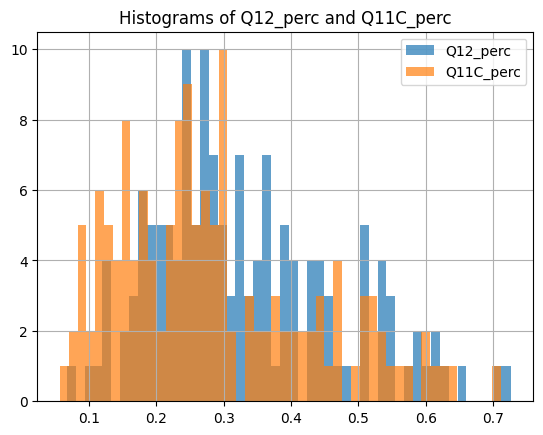

In [ ]:
# prompt: Using dataframe data_pivot: create histograms of Q12_perc and Q11C_perc with titles and legends on 1 graph, use .hist() only but add legend but it should be 1 graph layering on each other

# Import pandas for dataframe operations and matplotlib for plotting
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the histogram for 'Q12_perc' with a label for the legend
data_pivot['Q12_perc'].hist(ax=ax, label='Q12_perc', alpha=0.7, bins=50)

# Plot the histogram for 'Q11C_perc' on the same axes with a label for the legend
data_pivot['Q11C_perc'].hist(ax=ax, label='Q11C_perc', alpha=0.7, bins=50)

# Set the title of the plot
ax.set_title('Histograms of Q12_perc and Q11C_perc')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [ ]:
target_countries = data_pivot['Country'].unique()
print(target_countries)
print()
print('Number of Target countries', len(target_countries))

['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Haiti' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland' 'Israel' 'Italy'
 'Ivory Coast' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait'
 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Liberia' 'Libya' 'Lithuania'
 'Luxembourg' 'Macedonia' 'Madagascar' 'Malawi' 'Malaysia' 'Mali' 'Malta'
 'Mauritania' 'Mauritius' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Netherlands'
 'New Zealand' 'Nicar

In [ ]:
# Saving clean data - Use column Q12_perc as a Target column to represent "Trust in Science"
data_pivot.to_csv('trust_in_science_clean_data.csv')

data.head()

,WP5,YEAR_CALENDAR,Q11C,Q12,Q11C_binary,Q12_binary,Country
0,1,2018,2,2,0,0,United States
1,1,2018,1,2,1,0,United States
2,1,2018,3,98,0,0,United States
3,1,2018,1,1,1,1,United States
4,1,2018,1,1,1,1,United States


---

### Cleaning Vaccination rate data

In [ ]:
!wget https://raw.githubusercontent.com/sonia-br/stat_analysis_vaccination/main/vaccination_data_1.csv

vac_1_data = pd.read_csv('vaccination_data_1.csv', sep=';').fillna(0)

!wget https://raw.githubusercontent.com/sonia-br/stat_analysis_vaccination/main/vaccination_data_2.csv

vac_2_data = pd.read_csv('vaccination_data_2.csv', sep=';').fillna(0)

In [ ]:
vac_1_data.head()

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,AFG,Afghanistan,2018.0,DTPCV3,"DTP-containing vaccine, 3rd dose",ADMIN,Administrative coverage,1689680,1467023.0,"86,82"
1,COUNTRIES,ALB,Albania,2018.0,DTPCV3,"DTP-containing vaccine, 3rd dose",ADMIN,Administrative coverage,29425,29066.0,"98,78"
2,COUNTRIES,DZA,Algeria,2018.0,DTPCV3,"DTP-containing vaccine, 3rd dose",ADMIN,Administrative coverage,1090227,992791.0,"91,06"
3,COUNTRIES,AND,Andorra,2018.0,DTPCV3,"DTP-containing vaccine, 3rd dose",ADMIN,Administrative coverage,0,0.0,0
4,COUNTRIES,AGO,Angola,2018.0,DTPCV3,"DTP-containing vaccine, 3rd dose",ADMIN,Administrative coverage,1023479,858271.0,84


In [ ]:
vac_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GROUP                          620 non-null    object 
 1   CODE                           620 non-null    object 
 2   NAME                           620 non-null    object 
 3   YEAR                           620 non-null    float64
 4   ANTIGEN                        620 non-null    object 
 5   ANTIGEN_DESCRIPTION            620 non-null    object 
 6   COVERAGE_CATEGORY              620 non-null    object 
 7   COVERAGE_CATEGORY_DESCRIPTION  620 non-null    object 
 8   TARGET_NUMBER                  620 non-null    object 
 9   DOSES                          620 non-null    float64
 10  COVERAGE                       620 non-null    object 
dtypes: float64(2), object(9)
memory usage: 53.4+ KB


In [ ]:
vac_1_data = vac_1_data.query('COVERAGE_CATEGORY == "ADMIN"')[['NAME', 'TARGET_NUMBER', 'DOSES', 'COVERAGE']]
vac_2_data = vac_2_data.query('COVERAGE_CATEGORY == "ADMIN"')[['NAME', 'TARGET_NUMBER', 'DOSES', 'COVERAGE']]

In [ ]:
for i in ['TARGET_NUMBER', 'DOSES', 'COVERAGE']:
  vac_1_data[i] = vac_1_data[i].astype(str).str.replace(',', '.', regex=False)
  vac_2_data[i] = vac_2_data[i].astype(str).str.replace(',', '.', regex=False)

In [ ]:
# prompt: use vac_1_data and vac_2_data and change datatypes for TARGET_NUMBER, DOSES, COVERAGE, for first two - to Integer, for COVERAGE - float then DIVIDE by 100 and ROUND up to 2 decimals
vac_1_data['TARGET_NUMBER'] = vac_1_data['TARGET_NUMBER'].astype(float).astype(int)
vac_1_data['DOSES'] = vac_1_data['DOSES'].astype(float).astype(int)
vac_1_data['COVERAGE'] = (vac_1_data['DOSES'] / vac_1_data['TARGET_NUMBER']).round(2)
# vac_1_data['COVERAGE'] = (vac_1_data['COVERAGE'].astype(float) / 100).round(2)

vac_2_data['TARGET_NUMBER'] = vac_2_data['TARGET_NUMBER'].astype(float).astype(int)
vac_2_data['DOSES'] = vac_2_data['DOSES'].astype(float).astype(int)
vac_2_data['COVERAGE'] = (vac_2_data['DOSES'] / vac_2_data['TARGET_NUMBER']).round(2)

print(vac_1_data.info())
print(vac_2_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           212 non-null    object 
 1   TARGET_NUMBER  212 non-null    int64  
 2   DOSES          212 non-null    int64  
 3   COVERAGE       192 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           212 non-null    object 
 1   TARGET_NUMBER  212 non-null    int64  
 2   DOSES          212 non-null    int64  
 3   COVERAGE       191 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.3+ KB
None


In [ ]:
vac_1_data.head()

,NAME,TARGET_NUMBER,DOSES,COVERAGE
0,Afghanistan,1689680,1467023,0.87
1,Albania,29425,29066,0.99
2,Algeria,1090227,992791,0.91
3,Andorra,0,0,NaN
4,Angola,1023479,858271,0.84


In [ ]:
vac_2_data.head()

,NAME,TARGET_NUMBER,DOSES,COVERAGE
0,Afghanistan,1689680,1393058,0.82
1,Albania,29425,27677,0.94
2,Algeria,1090227,871944,0.80
3,Andorra,0,0,NaN
4,Angola,1023479,808579,0.79


In [ ]:
# Filtering only those 143 that we have
vac_1_data = vac_1_data.query('NAME in @target_countries')
vac_2_data = vac_2_data.query('NAME in @target_countries')

print('Countries left for analysis:', len(vac_1_data))

Countries left for analysis: 121


In [ ]:
# merging vac_1 and vac_2 data

vac_data = pd.merge(vac_1_data, vac_2_data,
                    how='inner', on=['NAME'])

vac_data.head()

,NAME,TARGET_NUMBER_x,DOSES_x,COVERAGE_x,TARGET_NUMBER_y,DOSES_y,COVERAGE_y
0,Afghanistan,1689680,1467023,0.87,1689680,1393058,0.82
1,Albania,29425,29066,0.99,29425,27677,0.94
2,Algeria,1090227,992791,0.91,1090227,871944,0.80
3,Argentina,692893,593292,0.86,696196,657230,0.94
4,Armenia,34929,32303,0.92,37216,35461,0.95


In [ ]:
# taking only Country name, Vac1 and Vac2 COVERAGE rates
vac_data = vac_data[['NAME', 'COVERAGE_x', 'COVERAGE_y']]

# calculating average COVERAGE of 2 VACCINES to find the final VaX rate
vac_data['Vacc_rate'] = ((vac_data['COVERAGE_x'] + vac_data['COVERAGE_y']) / 2).round(2)

# selecting only 2 target columns
vac_data = vac_data[['NAME', 'Vacc_rate']]

# renaming NAME to Country as in Trust in Science table
vac_data.columns = ['Country', 'Vacc_rate']

vac_data.head()

,Country,Vacc_rate
0,Afghanistan,0.84
1,Albania,0.96
2,Algeria,0.86
3,Argentina,0.90
4,Armenia,0.94


---

### CREATING THE FINAL TABLE - INTERSECTION OF Trust in Science and Vacc Rate

In [ ]:
display(data_pivot.head())
print(data_pivot.info())

,Country,Respondents,Q11C_perc,Q11C_positive_ans,Q12_perc,Q12_positive_ans
0,Afghanistan,1000,0.163,163,0.193,193
1,Albania,1000,0.121,121,0.297,297
2,Algeria,1000,0.182,182,0.242,242
3,Argentina,1000,0.416,416,0.393,393
4,Armenia,1000,0.220,220,0.183,183


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            143 non-null    object 
 1   Respondents        143 non-null    int64  
 2   Q11C_perc          143 non-null    float64
 3   Q11C_positive_ans  143 non-null    int64  
 4   Q12_perc           143 non-null    float64
 5   Q12_positive_ans   143 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 6.8+ KB
None


In [ ]:
# taking only Country name and Q12_perc as a Trust in Science rate
data_pivot = data_pivot[['Country', 'Q12_perc']]

# renaming Q12 in Trust in science rate
data_pivot.columns = ['Country', 'Trust_rate']

# formating float of trust rate up to 2 decimals
data_pivot['Trust_rate'] = data_pivot['Trust_rate'].round(2)

data_pivot.head()

/tmp/ipython-input-26-3684232262.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pivot['Trust_rate'] = data_pivot['Trust_rate'].round(2)


,Country,Trust_rate
0,Afghanistan,0.19
1,Albania,0.30
2,Algeria,0.24
3,Argentina,0.39
4,Armenia,0.18


In [ ]:
# Creating final table with both Trust in Science and Vaccination rate

final_table = pd.merge(data_pivot, vac_data,
                       how='inner',
                       on=['Country'])

display(final_table.head())

print()
print(f'Final table contains {len(final_table)} countries')

,Country,Trust_rate,Vacc_rate
0,Afghanistan,0.19,0.84
1,Albania,0.30,0.96
2,Algeria,0.24,0.86
3,Argentina,0.39,0.90
4,Armenia,0.18,0.94



Final table contains 121 countries


In [ ]:
# removing rows where data is missing
final_table = final_table.dropna(subset=['Trust_rate', 'Vacc_rate'])

final_table = final_table[
    (final_table['Vacc_rate'] != np.inf) &
    (final_table['Vacc_rate'] != -np.inf)
]

print()
print(f"Cleaned table contains rows: {len(final_table)}")



Cleaned table contains rows: 106


In [ ]:
# Saving the end table
final_table.to_csv('Final_clean_table_STATS_TRUST_X_VACC.csv')